In [1]:
import numpy as np 
import pandas as pd 

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
df = pd.read_csv('train.csv')

In [4]:
df.shape

(42000, 785)

In [5]:
df.sample(5)

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
13202      8       0       0       0       0       0       0       0       0   
9301       3       0       0       0       0       0       0       0       0   
24964      9       0       0       0       0       0       0       0       0   
31007      8       0       0       0       0       0       0       0       0   
39731      0       0       0       0       0       0       0       0       0   

       pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  \
13202       0  ...         0         0         0         0         0   
9301        0  ...         0         0         0         0         0   
24964       0  ...         0         0         0         0         0   
31007       0  ...         0         0         0         0         0   
39731       0  ...         0         0         0         0         0   

       pixel779  pixel780  pixel781  pixel782  pixel783  
13202         0         0         0         0         0  
9301          0         0         0         0         0  
24964         0         0         0         0         0  
31007         0         0         0         0         0  
39731         0         0         0         0         0  

[5 rows x 785 columns]

In [6]:
import matplotlib.pyplot as plt

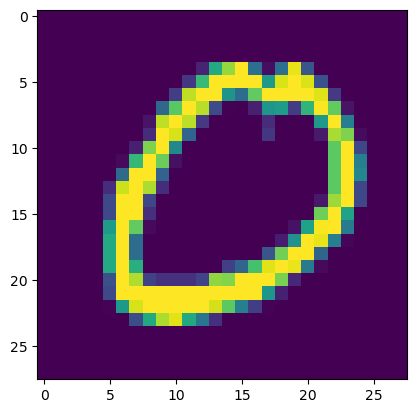

In [7]:
plt.imshow(df.iloc[13051,1:].values.reshape(28,28))

In [8]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [10]:
X_train.shape

(33600, 784)

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:

knn = KNeighborsClassifier()
knn.fit(X_train,y_train)


KNeighborsClassifier()

In [23]:
import time
start = time.time()
y_pred = knn.predict(X_test.values)  # Use .values to convert DataFrame to numpy array
print(time.time() - start)


AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [14]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9648809523809524

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [16]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
from sklearn.decomposition import PCA
pca = PCA(n_components=200)

In [18]:
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [19]:
X_train_trf.shape

(33600, 200)

In [20]:
knn = KNeighborsClassifier()

In [21]:
knn.fit(X_train_trf,y_train)
y_pred = knn.predict(X_test_trf)
accuracy_score(y_test,y_pred)

0.950952380952381

In [22]:
for i in range(1,10):
    pca = PCA(n_components=i)
    X_train_trf = pca.fit_transform(X_train)
    X_test_trf = pca.transform(X_test)
    
    knn = KNeighborsClassifier()
    
    knn.fit(X_train_trf,y_train)
    
    y_pred = knn.predict(X_test_trf)
    
    print(accuracy_score(y_test,y_pred))

0.259047619047619
0.3238095238095238
0.5105952380952381
0.6661904761904762
0.7378571428571429
0.8227380952380953
0.8432142857142857
0.8722619047619048
0.8867857142857143


In [24]:
# transforming to a 2D coordinate system
pca = PCA(n_components=2)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [25]:
X_train_trf

array([[-2.7186353 , -0.48957623],
       [-0.6769028 , -6.75409979],
       [-3.03332422,  6.51018927],
       ...,
       [ 2.14885599,  0.78082366],
       [ 1.05956619,  0.94802647],
       [17.70267455,  1.96214718]])

In [26]:
import plotly.express as px
y_train_trf = y_train.astype(str)
fig = px.scatter(x=X_train_trf[:,0],
                 y=X_train_trf[:,1],
                 color=y_train_trf,
                 color_discrete_sequence=px.colors.qualitative.G10
                )
fig.show()

In [27]:
# transforming in 3D
pca = PCA(n_components=3)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [28]:
pca.explained_variance_
# Eigen values

array([40.67111198, 29.17023383, 26.744596  ])

In [29]:
pca.components_.shape
# Eigen vectors

(3, 784)

In [30]:
pca.explained_variance_ratio_

array([0.05785192, 0.0414927 , 0.03804239])

In [31]:
pca = PCA(n_components=None)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [32]:
pca.explained_variance_.shape

(784,)

In [33]:
pca.components_.shape

(784, 784)

In [34]:
np.cumsum(pca.explained_variance_ratio_)

array([0.05785192, 0.09934462, 0.13738701, 0.16704964, 0.19286525,
       0.21541506, 0.23514574, 0.25289854, 0.26858504, 0.28294568,
       0.29664822, 0.30892077, 0.32038989, 0.33162017, 0.34220546,
       0.35240477, 0.36198153, 0.37140862, 0.38053351, 0.38943521,
       0.39783462, 0.40603525, 0.41388828, 0.42145568, 0.42882829,
       0.43584714, 0.44282633, 0.44953738, 0.45593583, 0.4622392 ,
       0.46839271, 0.4744166 , 0.48025334, 0.48603881, 0.49176214,
       0.49722614, 0.50265822, 0.50793994, 0.51307376, 0.51801392,
       0.52289063, 0.52771041, 0.53239246, 0.53698588, 0.54156249,
       0.54605468, 0.5505015 , 0.55491691, 0.55926803, 0.56358836,
       0.56780645, 0.57198888, 0.57606882, 0.58008887, 0.58407223,
       0.58801822, 0.59188694, 0.59571889, 0.59948441, 0.60322635,
       0.60687487, 0.6104829 , 0.61402176, 0.61750117, 0.62094441,
       0.62432378, 0.62767368, 0.63099377, 0.63426257, 0.63746765,
       0.64065542, 0.64376931, 0.64686564, 0.64992395, 0.65296

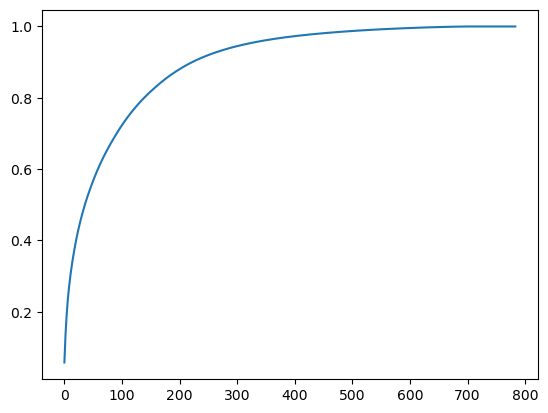

In [35]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))